# Data Visualization in Python - Assignment

## General visualization

### Import of dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

path= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv'
df = pd.read_csv(path, index_col=0)      # index_col=0 => column 0 used as index
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


### Data Visualization:

In [2]:
### ordering topics by descending order of "Very interested"
df_sorted = df.sort_values('Very interested', ascending=False)
df_sorted

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [3]:
### df in percentage
df_percent = df_sorted/2233
df_percent.round(2)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06
Data Journalism,0.19,0.48,0.27


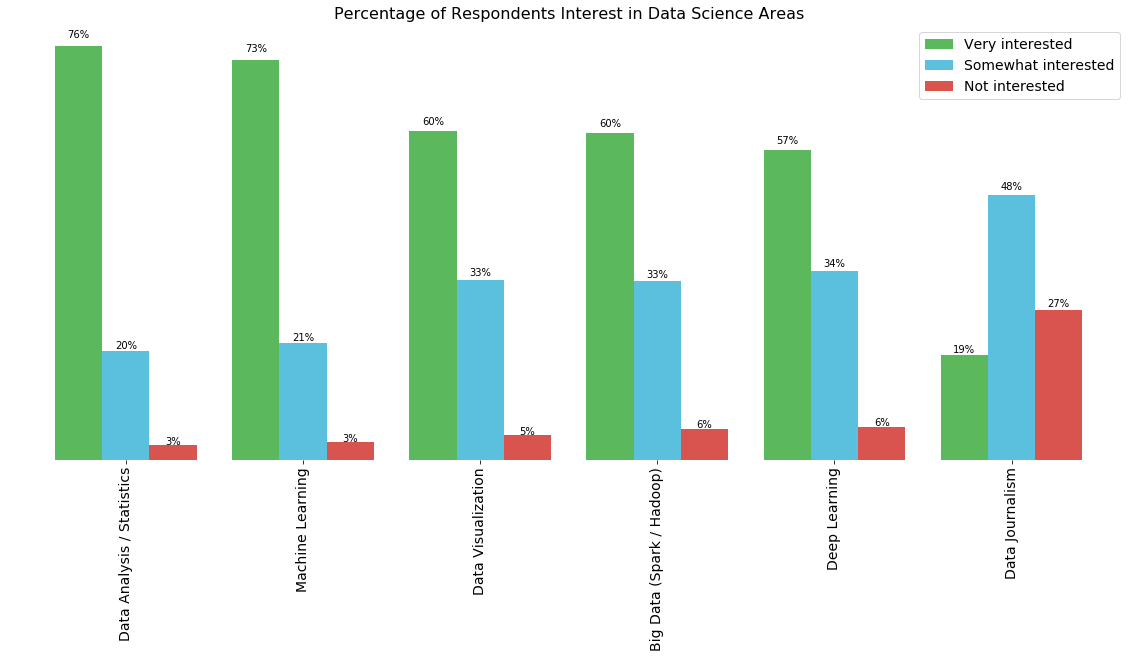

In [4]:
### Artistic layer
colors = ['#5cb85c','#5bc0de','#d9534f']

ax = df_percent.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors, edgecolor=None)
plt.legend(labels=df_percent.columns,fontsize= 14)
plt.title("Percentage of Respondents Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

### Annotations' percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')



## Geospatial data

### Import and transformation of dataset

In [2]:
path1= 'https://cocl.us/sanfran_crime_dataset'
df1 = pd.read_csv(path1, index_col=0)      # index_col=0 => column 0 used as index
df1.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,,
120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [3]:
df1.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)

neighborhood_table = df1.groupby(['Neighborhood']).size().reset_index(name='Count')
neighborhood_table

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


## Choropleth Map

In [4]:
!wget --quiet https://cocl.us/sanfran_geojson ## Geo JSON file

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/noarch/repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='conda.anaconda.org', port=443): Read timed out."))


Folium installed and imported!


In [6]:
SF_geo = r'sanfran_geojson' ## Geo JSON file

In [47]:
SF_latitude = 37.774 
SF_longitude = -122.431
SF_map = folium.Map(location=[SF_latitude, SF_longitude], zoom_start=12) # creation of the map

To create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1. geo_data, which is the GeoJSON file.
2. data, which is the dataframe containing the data.
3. columns, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4. key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [43]:
SF_map.choropleth(
    geo_data=SF_geo,
    data=neighborhood_table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of crimes in SF per district'
)

In [48]:
SF_map # display of the map with choropleth